# Gradientes Imagenes

Meida de cambio en la "funcion imagen" $F(x, y)$ x columnas, y filas

## Definicion matematica

$ \nabla F(x, y) = \left[ \frac{\partial F}{\partial x}, \frac{\partial F}{\partial y} \right] $

F(0,0) = valor de la tasa de cambio en el pixel en 0,0

Escala de grises

RGB



Matrix:
[[  0  50 100 150 200]
 [  0  50 100 150 200]
 [  0  50 100 150 200]
 [  0  50 100 150 200]
 [  0  50 100 150 200]]


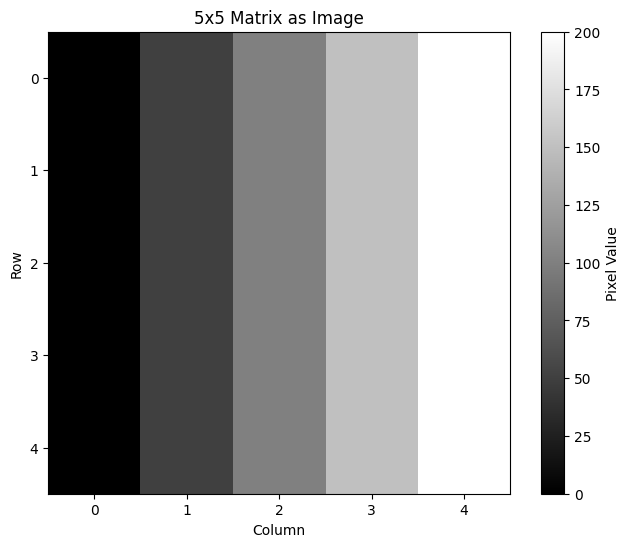

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 5x5 matrix with values starting at 0 and incrementing by 50
matrix = np.tile(np.arange(0, 250, 50), (5, 1))
print("Matrix:")
print(matrix)

# Plot the matrix as an image
plt.figure(figsize=(8, 6))
plt.imshow(matrix, cmap='gray', interpolation='nearest')
plt.colorbar(label='Pixel Value')
plt.title('5x5 Matrix as Image')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

Matrix:
[[  0   0   0   0   0]
 [ 50  50  50  50  50]
 [100 100 100 100 100]
 [150 150 150 150 150]
 [200 200 200 200 200]]


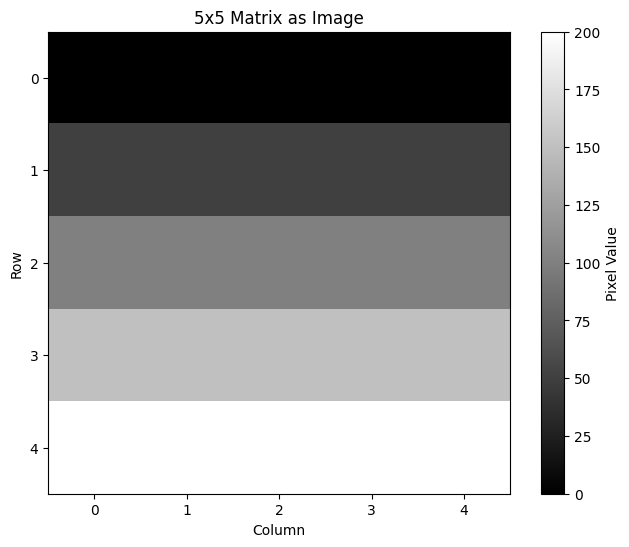

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 5x5 matrix with values starting at 0 and incrementing by 50
matrix_h = matrix.transpose()
print("Matrix:")
print(matrix_h)

# Plot the matrix as an image
plt.figure(figsize=(8, 6))
plt.imshow(matrix_h, cmap='gray', interpolation='nearest')
plt.colorbar(label='Pixel Value')
plt.title('5x5 Matrix as Image')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

**Direccion del gradiente**


**Magniutd del gradiente**

Borde de una imagen esta siempre perpendicular a la direccion del gradiente

$f * g = h$

$h$ casi siempre es mas grande que $f$ y $g$

Agregar padding a $f$
- ceros
- repetir bordes
- constante diferente de 0

**Kernel de Convolucion o Filtro**

f (imagen) * g (kernel) = h (imagen transformada)

Matriz mas pequena que la original que a a travesar la imagen para modificarla (convolución). Los valores de esta matriz son valores arbitrarios que al aplicarse resultan en una modificación a la imagen que realza detalles, bordes, aclara, distorsiona.

Filtros comunes

* Filtro Sobel
- Detectar bordes en una dirección
(horizontal o vertical)
- Valores del filtro vienen de aproximar la derivada de primer orden

[ -1  0  1
  -2  0  2
  -1  0  1 ]

[ -1 -2 -1
   0  0  0
   1  2  1 ]

* Filtro Laplace
- Detecta bordes sin importar la dirección
- Valores aproximan una derivada de segundo orden

[ 0 -1  0
 -1  4 -1
  0 -1  0 ]

* Filtro Gaussiana
- Suavisa la imagen (reducir ruido)
- Valores aproxima una distribucion Gaussiana en 2D
1/16 ·
[ 1 2 1
  2 4 2
  1 2 1 ]


<ipython-input-12-7458b557d000>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_np, torch.tensor(sobel_x, dtype=torch.float32).unsqueeze(0), padding=1
<ipython-input-12-7458b557d000>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(sobel_y, dtype=torch.float32).unsqueeze(0),


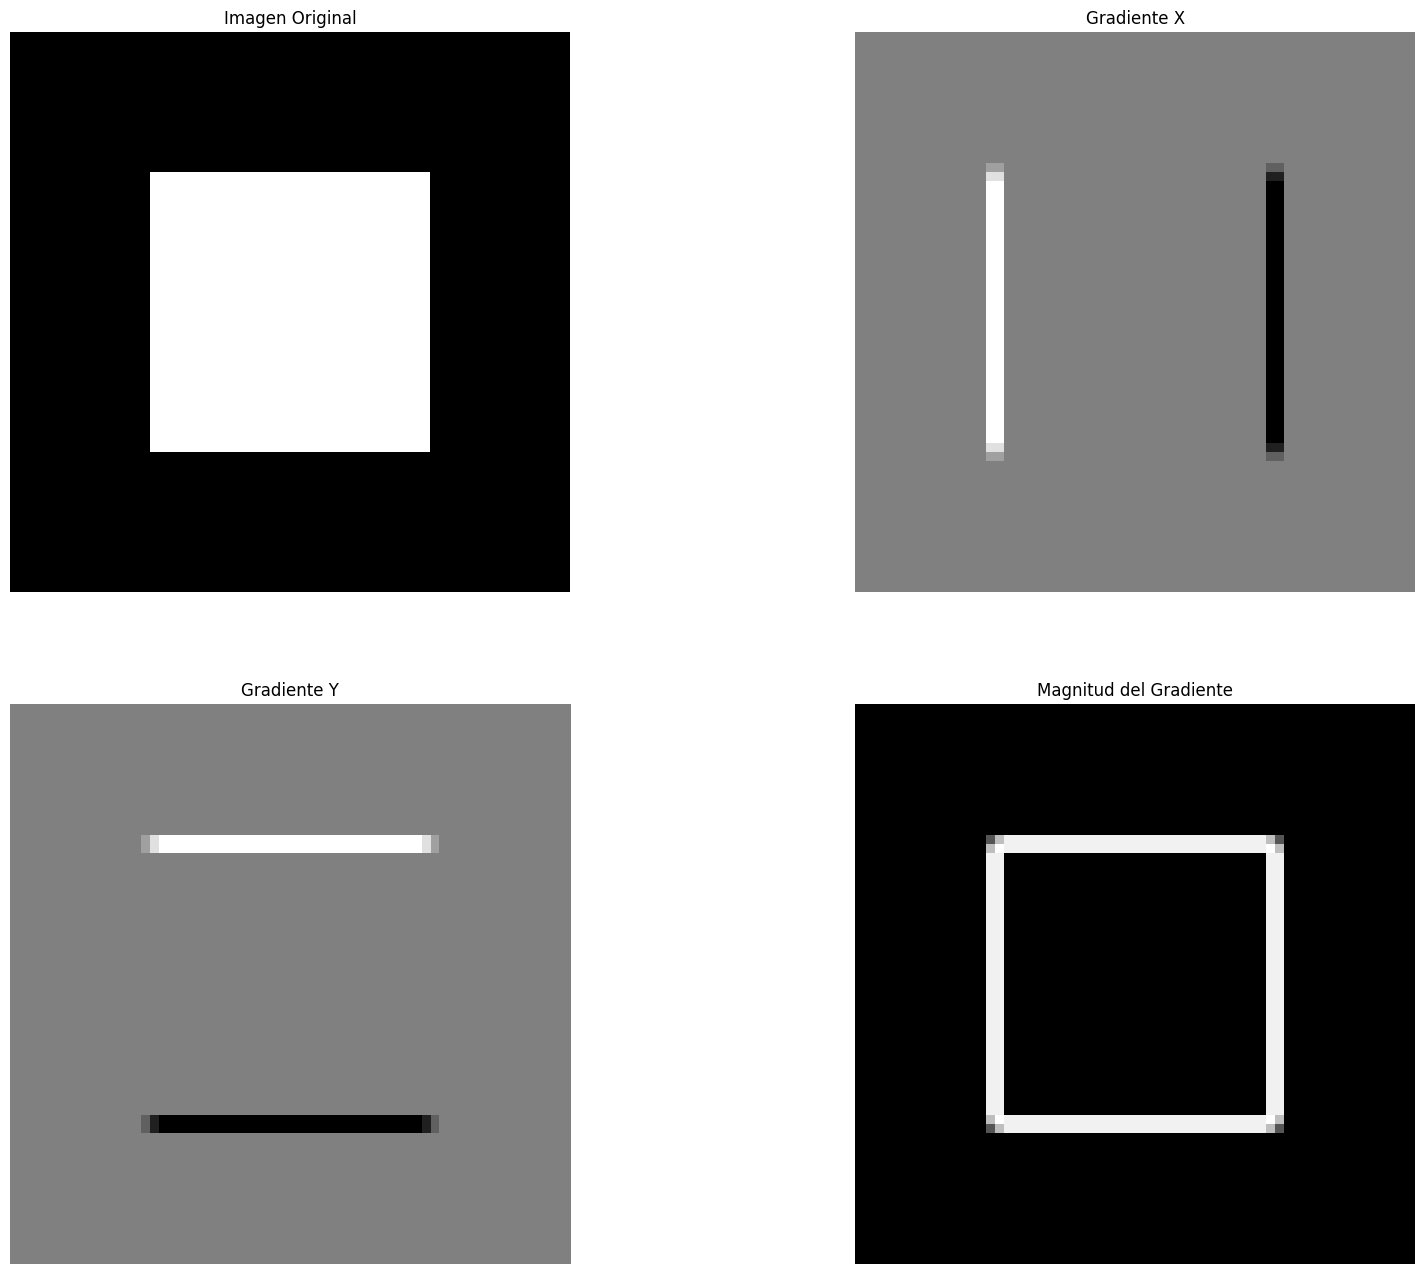

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

img_np = torch.zeros((1, 1, 64, 64), dtype=torch.float32)  # 1 imagen 64x64 en un canal

# torch los valores de los pixeles (0-255) -> (0-1)
img_np[:, :, 16:48, 16:48] = 1.0  # cuadrado blanco sobre un fondo negro

fig, ax = plt.subplots(2, 2, figsize=(20, 16))
axs = ax.flatten()
axs[0].imshow(img_np.squeeze(), cmap="gray")  # Squeeze to remove singleton dimensions
# ax[0].imshow(img_np[0, 0, :, :].numpy(), cmap='gray', vmin=0, vmax=1)
axs[0].set_title("Imagen Original")
axs[0].axis("off")

# Kernel Sobel
sobel_x = torch.tensor([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=torch.float32).unsqueeze(0) # Shape: (1, 1, 3, 3)
sobel_y = torch.tensor([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
], dtype=torch.float32).unsqueeze(0) # Shape: (1, 1, 3, 3)
     

grad_x = torch.nn.functional.conv2d(
    img_np, torch.tensor(sobel_x, dtype=torch.float32).unsqueeze(0), padding=1
)
grad_y = torch.nn.functional.conv2d(
    img_np,
    torch.tensor(sobel_y, dtype=torch.float32).unsqueeze(0),
    padding=1,
)

axs[1].imshow(grad_x.squeeze(), cmap="gray")
axs[1].set_title("Gradiente X")
axs[1].axis("off")

axs[2].imshow(grad_y.squeeze(), cmap="gray")
axs[2].set_title("Gradiente Y")
axs[2].axis("off")

magnitude = torch.sqrt(grad_x**2 + grad_y**2)
axs[3].imshow(magnitude.squeeze(), cmap="gray")
axs[3].set_title("Magnitud del Gradiente")
axs[3].axis("off")

plt.show()

Shape de la imagen original: torch.Size([1, 1, 1024, 1024])


<ipython-input-18-2d22b7952e2e>:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_np, torch.tensor(sobel_x, dtype=torch.float32).unsqueeze(0), padding=1
<ipython-input-18-2d22b7952e2e>:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(sobel_y, dtype=torch.float32).unsqueeze(0),


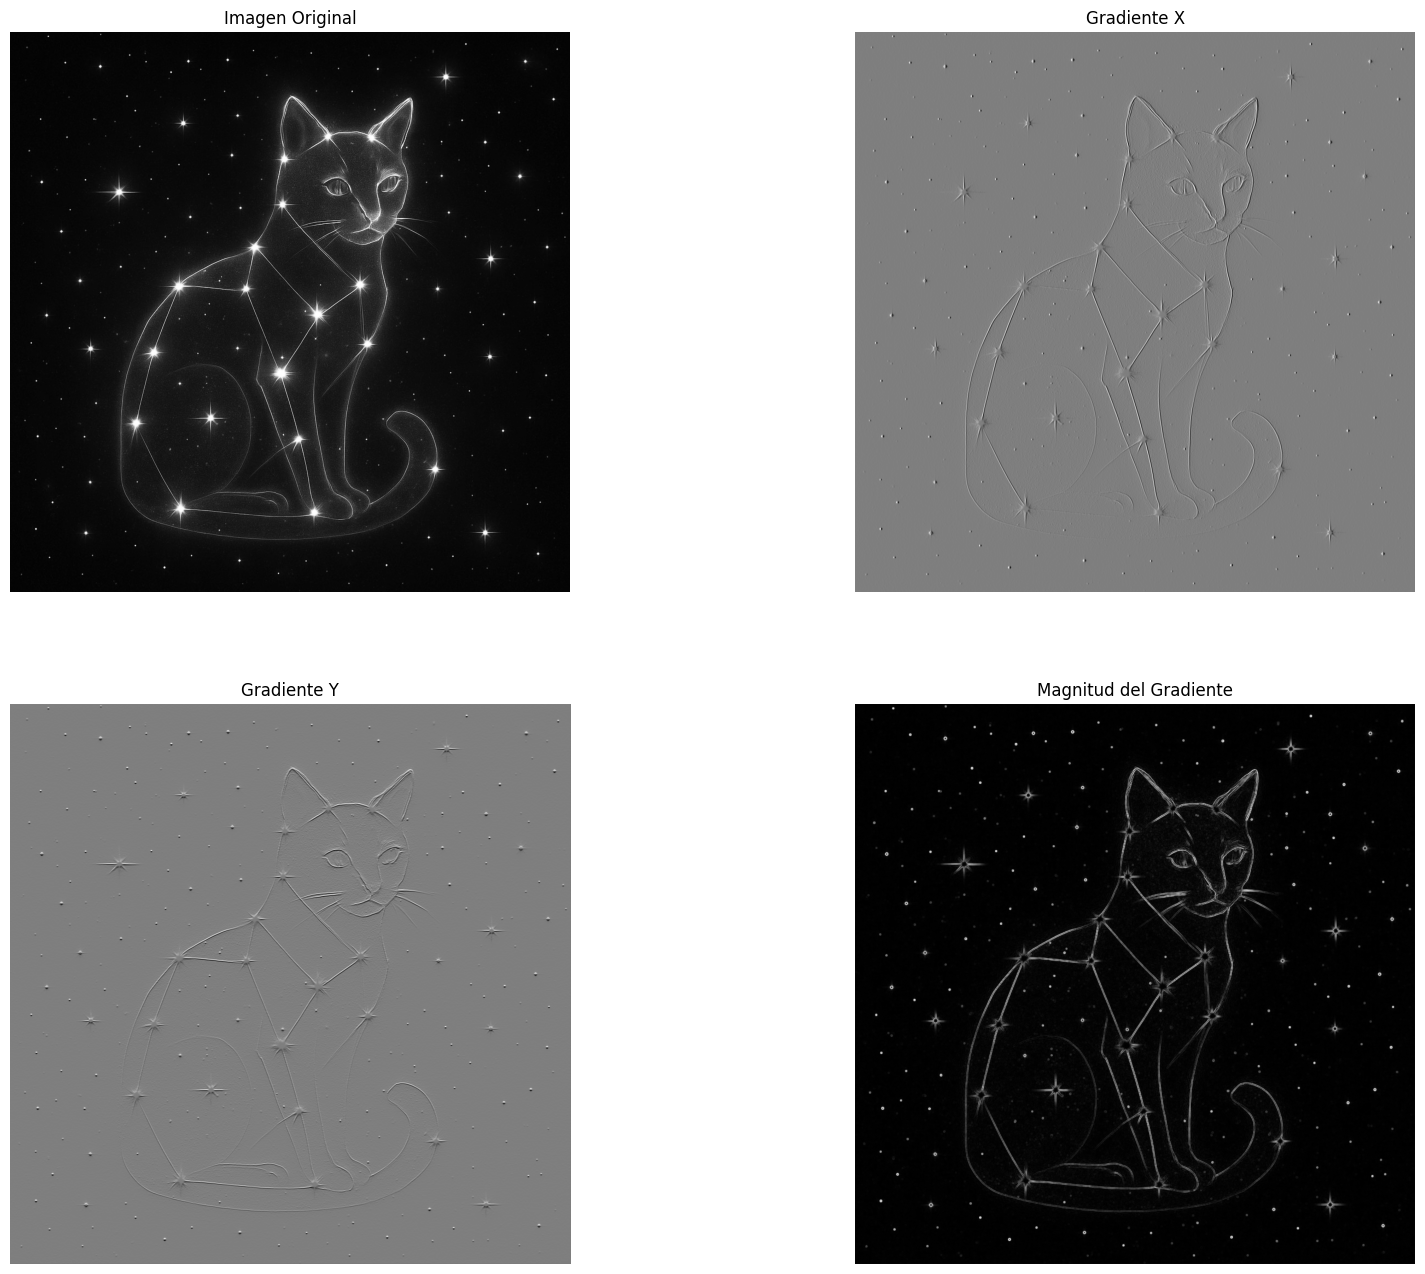

In [18]:
from PIL import Image
import torchvision.transforms as T
img = Image.open("cat-constelation.jpg").convert("L")  # Convertir a escala de grises
transform = T.Compose([
    T.ToTensor(),        # Convertir a tensor
    lambda x: x.unsqueeze(0),  # Añadir una dimensión de batch
])

img_np = transform(img)  # Aplicar la transformación

print(f"Shape de la imagen original: {transform(img).shape}")

fig, ax = plt.subplots(2, 2, figsize=(20, 16))
axs = ax.flatten()
axs[0].imshow(img_np.squeeze(), cmap="gray")  # Squeeze to remove singleton dimensions
# ax[0].imshow(img_np[0, 0, :, :].numpy(), cmap='gray', vmin=0, vmax=1)
axs[0].set_title("Imagen Original")
axs[0].axis("off")

# Kernel Sobel
sobel_x = torch.tensor([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=torch.float32).unsqueeze(0) # Shape: (1, 1, 3, 3)
sobel_y = torch.tensor([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
], dtype=torch.float32).unsqueeze(0) # Shape: (1, 1, 3, 3)
     

grad_x = torch.nn.functional.conv2d(
    img_np, torch.tensor(sobel_x, dtype=torch.float32).unsqueeze(0), padding=1
)
grad_y = torch.nn.functional.conv2d(
    img_np,
    torch.tensor(sobel_y, dtype=torch.float32).unsqueeze(0),
    padding=1,
)

axs[1].imshow(grad_x.squeeze(), cmap="gray")
axs[1].set_title("Gradiente X")
axs[1].axis("off")

axs[2].imshow(grad_y.squeeze(), cmap="gray")
axs[2].set_title("Gradiente Y")
axs[2].axis("off")

magnitude = torch.sqrt(grad_x**2 + grad_y**2)
axs[3].imshow(magnitude.squeeze(), cmap="gray")
axs[3].set_title("Magnitud del Gradiente")
axs[3].axis("off")

plt.show()